In [37]:
# data manipulation and math
import numpy as np
import pandas as pd

# plotting and visualization
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import to_rgba
import seaborn as sns

# Text Preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Text Vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Dimensionality reduction EDA
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ghaza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghaza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ghaza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Data Wrangling**

In [38]:
#uploading the data
game = pd.read_csv(r"C:\Users\ghaza\OneDrive\Desktop\Projects\Spring board\Capstone 2\Gamestop\Gamestop\gamestop_product_reviews_dataset.csv")

In [39]:
game.head(3)

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
0,https://www.gamestop.com/electronics/tvs-monitors/televisions/products/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/11180293.html,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,NaN,My new OLED is a upgrade and it's great! This is my third Vizio TV to replace my first one that went blank after 12 years of stellar service. (I'm even thinking of getting it repaired if possible for the great grand kids.) I have always liked the picture quality and the price of Vizio's. You cant go wrong.,yes: I recommend this product,NaN,0,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a11180293%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=130,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,16/01/2022 16:17:56
1,https://www.gamestop.com/electronics/tvs-monitors/televisions/products/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/11180293.html,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable. The unit looks great both in and off. It is short on physical features (Bluetooth and whatnot) but I use both external sound and media units. This is a great OLED to buy if you want a great TV at a reasonable price.,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a11180293%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=130,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,16/01/2022 16:17:56
2,https://www.gamestop.com/electronics/tvs-monitors/televisions/products/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/11180293.html,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,EC82,Quality,I’m quite pleased with the entire product as a whole. The quality of picture and sound really speaks for itself when in use.,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a11180293%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=130,229174444,178b3b03-2c56-5abc-a016-c74c2633c9c2,16/01/2022 16:17:56


In [40]:

game['url'].iloc[2]

'https://www.gamestop.com/electronics/tvs-monitors/televisions/products/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/11180293.html'

In [41]:
print(game.columns)

Index(['url', 'name', 'brand', 'sku', 'reviewer_name', 'review_title',
       'review_description', 'recommended_review', 'verifed_purchaser',
       'helpful_count', 'not_helpful_count', 'reviewed_at', 'images', 'rating',
       'average_rating', 'reviews_count', 'reviews_link', 'comment_id',
       'uniq_id', 'scraped_at'],
      dtype='object')


In [42]:
print('The data have ', game.shape[0], ' rows and ', game.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(game.columns)))

The data have  4686  rows and  20  columns

column names: 

url
name
brand
sku
reviewer_name
review_title
review_description
recommended_review
verifed_purchaser
helpful_count
not_helpful_count
reviewed_at
images
rating
average_rating
reviews_count
reviews_link
comment_id
uniq_id
scraped_at


In [43]:
game.describe()

,sku,helpful_count,not_helpful_count,rating,average_rating,reviews_count,comment_id
count,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03
mean,328932.494238,1.132949,0.873026,4.355741,4.408482,557.925523,1.462754e+08
std,246778.746328,3.746508,4.813523,1.124101,0.356394,521.627348,6.564770e+07
min,106427.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.343211e+07
25%,173787.000000,0.000000,0.000000,4.000000,4.272700,136.000000,1.203983e+08
50%,277492.000000,0.000000,0.000000,5.000000,4.422100,424.000000,1.358375e+08
75%,316366.000000,1.000000,0.000000,5.000000,4.615600,643.000000,2.123265e+08
max,954016.000000,103.000000,125.000000,5.000000,5.000000,2390.000000,1.109150e+09


In [44]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 4686 non-null   object 
 1   name                4686 non-null   object 
 2   brand               4686 non-null   object 
 3   sku                 4686 non-null   int64  
 4   reviewer_name       4686 non-null   object 
 5   review_title        4621 non-null   object 
 6   review_description  4686 non-null   object 
 7   recommended_review  4686 non-null   object 
 8   verifed_purchaser   2406 non-null   object 
 9   helpful_count       4686 non-null   int64  
 10  not_helpful_count   4686 non-null   int64  
 11  reviewed_at         4686 non-null   object 
 12  images              166 non-null    object 
 13  rating              4686 non-null   float64
 14  average_rating      4686 non-null   float64
 15  reviews_count       4686 non-null   int64  
 16  review

In [45]:
#check for duplicates in reviewers 
duplicates = game.duplicated(subset='reviewer_name')
game[duplicates].head()

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
101,https://www.gamestop.com/gaming-accessories/controllers/xbox-series-x%7Cs/products/microsoft-xbox-elite-series-2-wireless-controller-for-xbox-series-x-halo-infinite/11157418.html,Microsoft Xbox Elite Series 2 Wireless Controller for Xbox Series X Halo Infinite,Microsoft,307392,Anonymous,Incredible controller!,"Very cool design, feels great and comfortable in my hands.",No: I don’t recommend this product,Verified Purchaser,1,2,1 month ago,NaN,5.0,4.6993,306,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a11157418%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=30,191463669,66f84845-97c8-5cca-8bf1-4cc4cdfceead,16/01/2022 16:17:58
102,https://www.gamestop.com/gaming-accessories/controllers/xbox-series-x%7Cs/products/microsoft-xbox-elite-series-2-wireless-controller-for-xbox-series-x-halo-infinite/11157418.html,Microsoft Xbox Elite Series 2 Wireless Controller for Xbox Series X Halo Infinite,Microsoft,307392,Anonymous,Halo Infinite Elite Series 2 Controller,"This Halo Infinite Elite Series 2 controller is so awesome with the Halo theme on it, it's beautiful. Being able to customize the controller to my liking ranging from the controller sticks, d-pad, and how short you want your trigger throw is freaking amazing compared to a normal controller. Only con is that it's expensive, but once you open up the whole package and unboxing experience it is well worth the price.",yes: I recommend this product,Verified Purchaser,28,0,1 month ago,https://photos-us.bazaarvoice.com/photo/2/cGhvdG86Z2FtZXN0b3A/072599f5-2a25-5ef5-8849-9754e8b6a245~https://photos-us.bazaarvoice.com/photo/2/cGhvdG86Z2FtZXN0b3A/6af59174-1cef-591f-8923-faab15f2e6b3~https://photos-us.bazaarvoice.com/photo/2/cGhvdG86Z2FtZXN0b3A/308d0757-2721-5ed3-aea7-fe7ffc626d13~https://photos-us.bazaarvoice.com/photo/2/cGhvdG86Z2FtZXN0b3A/275dd39c-21d4-565f-a100-0e7cc1952d3f,5.0,4.6993,306,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a11157418%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=30,191462968,8a38edf4-1d13-54d2-a32c-f98303cbd0ac,16/01/2022 16:17:58
105,https://www.gamestop.com/gaming-accessories/controllers/xbox-series-x%7Cs/products/microsoft-xbox-elite-series-2-wireless-controller-for-xbox-series-x-halo-infinite/11157418.html,Microsoft Xbox Elite Series 2 Wireless Controller for Xbox Series X Halo Infinite,Microsoft,307392,Anonymous,Microsoft Elite 2 Pro Controller Halo Edition,The Microsoft Elite 2 Pro Controller is perfect for the console gamer of any level. The fact that it’s the Halo Edition makes it that much better! I love the controller and I’m glad they came out with this limited edition.,yes: I recommend this product,Verified Purchaser,0,0,1 month ago,NaN,5.0,4.6993,306,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a11157418%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=30,191443448,92468c29-d5fb-59dc-a142-1e67d15d1ee1,16/01/2022 16:17:58
106,https://www.gamestop.com/gaming-accessories/controllers/xbox-series-x%7Cs/products/microsoft-xbox-elite-series-2-wireless-controller-for-xbox-series-x-halo-infinite/11157418.html,Microsoft Xbox Elite Series 2 Wireless Controller for Xbox Series X Halo Infinite,Microsoft,307392,Anonymous,Beautiful controller,"This is a piece of art, amazing!",yes: I recommend this product,Verified Purchaser,1,0,1 month ago,https://photos-us.bazaarvoice.com/photo/2/cGhvdG86Z2FtZXN0b3A/5b003375-fcb4-5d67-9c4f-e72aac64eb42~https://photos-us.bazaarvoice.com/photo/2/cGhvdG86Z2FtZXN0b3A/720101d3-0222-5e44-b7ef-171d12bd40bb~https://photos-us.baz

Lets check if the reviewer's name who has duplicated names are all anonymous or there are people with the same name who put review


In [46]:
game[duplicates]['reviewer_name'].value_counts()

reviewer_name
Anonymous            173
pokemonguy             4
Chris                  3
William                2
Josh                   2
Jay72482               1
Joshua D               1
DuckyXD165             1
gofast                 1
Kevin65                1
JJD50                  1
jlt2014                1
Mike R13               1
John                   1
CassMN                 1
ToASTalex910           1
Nathan                 1
cr414                  1
Mjkent14               1
James                  1
Grandma                1
Monniemommy            1
Allison                1
Alex the gamerman      1
LOVE                   1
Hothroy                1
Mike                   1
Lorelei                1
PokemonMasterIII       1
toothfairy             1
TheGamerGalore         1
SDotRinney             1
jjcats                 1
Jimmyhudson            1
Den_SF                 1
Jacquie e              1
JetPack                1
NewbornRiddler         1
sportfan15             1
Justforgod8

We have 173 reviews that have been anonymously reviewed.  
Lets check with "dagugtggggggggg" user, it seems a rare name to be used as a user, yet we have two reviews from this reviewer, lets see if its safe to consider this user reviewed multiple times, if yes, was it for the same prodct or multiple product?    

In [47]:
game[game['reviewer_name']=="dagugtggggggggg"]

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
2546,https://www.gamestop.com/video-games/nds/products/pokemon-black---nintendo-ds/10078063.html,Pokemon Black - Nintendo DS,Nintendo,920599,dagugtggggggggg,Pokemon Down Grade,They took out many things and I hate the lack of graphics plus they took out many other Pokemon including legendaries.,No: I don’t recommend this product,NaN,0,51,10 years ago,NaN,1.0,4.4195,553,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10078063%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=200,17898386,1be05a57-1551-578c-8ada-efa2dffb06b7,16/01/2022 16:19:01
3193,https://www.gamestop.com/video-games/nds/products/pokemon-black---nintendo-ds/10078063.html,Pokemon Black - Nintendo DS,Nintendo,920599,dagugtggggggggg,Best Game Ever,This game is the best and I love it overall this game has the best poke'mon ever it is a big hit.,yes: I recommend this product,NaN,2,2,11 years ago,NaN,5.0,4.4195,553,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10078063%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=300,16421797,c4c8643a-0050-5f80-b7bc-0c3a217abbed,16/01/2022 16:19:08


It seems like this user has changed his mind on a product from 5 stars and recommending the product to 1 star and not recommending it in just a matter of one year. Interesting! Let's spot check couple of more users and see if we can form an assumption.

In [48]:
game[game['reviewer_name']=="GURIZUKUN"]

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
3227,https://www.gamestop.com/video-games/playstation-4/products/fallout-4---playstation-4/10122221.html,Fallout 4 - PlayStation 4,Bethesda Softworks,119073,GURIZUKUN,the games a beauty,"AYE man this story is so indepth if you hack terminals and actually read the story. like how the vault program was really a testing spot for temporary cryogenic freezing, and it was meant to be a secret and that everyone was dispensable. and theres so much more",yes: I recommend this product,Verified Purchaser,0,0,2 years ago,NaN,5.0,4.4535,1182,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10122221%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=50,132005476,8d864734-79c1-53ac-a86f-25e2a4859bf9,16/01/2022 16:19:08
4679,https://www.gamestop.com/video-games/retro-gaming/retro-playstation/playstation-3/products/mortal-kombat-vs.-dc-universe---playstation-3/10071298.html,Mortal Kombat Vs. DC Universe - PlayStation 3,Midway Games,930223,GURIZUKUN,play and put away bro,"great story the mechanics are EH, youll get used to it. plus its not like you're buying it to play competitive.... right??? you bought it for the story RIGHT!!!?",No: I don’t recommend this product,Verified Purchaser,2,0,2 years ago,NaN,5.0,4.1152,217,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10071298%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=0,125970136,3eb32a33-6fdb-5974-b8d1-5ed56a50caf5,16/01/2022 16:19:31


**This user reviewed two products. Interestingly, despite giving one product a 5-star rating, they didn't recommend it. This challenges the assumption that high ratings always lead to recommendations. It prompts us to examine the correlation between star ratings and product recommendations. Let's delve into that.**

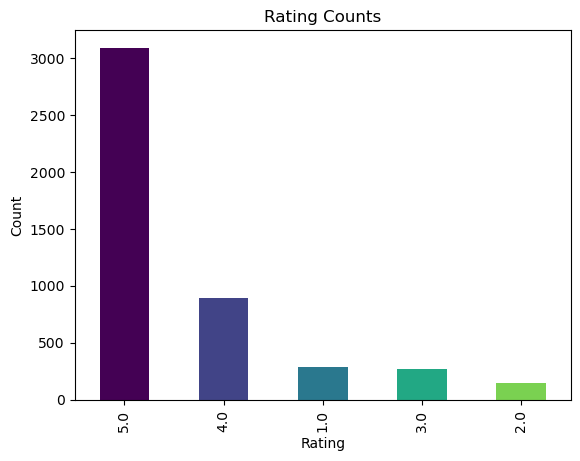

In [49]:
rating_counts = game['rating'].value_counts()

# Create a color map
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(rating_counts)) for i in range(len(rating_counts))]

# Plot the bar chart
rating_counts.plot(kind='bar', title='Rating Counts', color=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [50]:
# number of reviews for each category
print(game['rating'].value_counts())

rating
5.0    3089
4.0     892
1.0     284
3.0     272
2.0     149
Name: count, dtype: int64


Let's iterate through each star rating to calculate the percentage of reviews that recommend the product for each rating level.

In [51]:
# Lets encode the 'recommended_review' before we proceed, if a product has been recommended, we assign 1, 
# otherwise we assign 0.

game['recommended_review'] = game['recommended_review'].apply(lambda x: 1 if 'yes' in x.lower() else 0)

In [52]:
# Loop through each unique star rating in the 'rating' column
for rating in sorted(game['rating'].unique()):
    # Get the total reviews for the current rating
    total_reviews = game[game['rating'] == rating]['recommended_review'].count()
    
    # Get the number of recommended reviews for the current rating
    recommended_reviews = game[(game['rating'] == rating) & (game['recommended_review'] == 1)].count()['recommended_review']
    
    # Calculate the percentage of reviews that are recommended
    if total_reviews > 0:  # Ensure there is no division by zero
        percentage_recommended = (recommended_reviews / total_reviews) * 100
    else:
        percentage_recommended = 0  # Handle cases with zero total reviews
    
    # Calculate the percentage of reviews that are not recommended
    percentage_not_recommended = 100 - percentage_recommended
    
    # Print the results
    print(f"For {rating}-star reviews:")
    print(f"  Total reviews: {total_reviews}")
    print(f"  Recommended: {recommended_reviews} ({percentage_recommended:.2f}%)")
    print(f"  Not Recommended: {total_reviews - recommended_reviews} ({percentage_not_recommended:.2f}%)")
    print()

For 1.0-star reviews:
  Total reviews: 284
  Recommended: 8 (2.82%)
  Not Recommended: 276 (97.18%)

For 2.0-star reviews:
  Total reviews: 149
  Recommended: 11 (7.38%)
  Not Recommended: 138 (92.62%)

For 3.0-star reviews:
  Total reviews: 272
  Recommended: 95 (34.93%)
  Not Recommended: 177 (65.07%)

For 4.0-star reviews:
  Total reviews: 892
  Recommended: 702 (78.70%)
  Not Recommended: 190 (21.30%)

For 5.0-star reviews:
  Total reviews: 3089
  Recommended: 2405 (77.86%)
  Not Recommended: 684 (22.14%)



Interestingly, a 5-star rating does not guarantee a recommendation, nor does a 1-star rating ensure a product is not recommended. This observation is evident in the visual below.

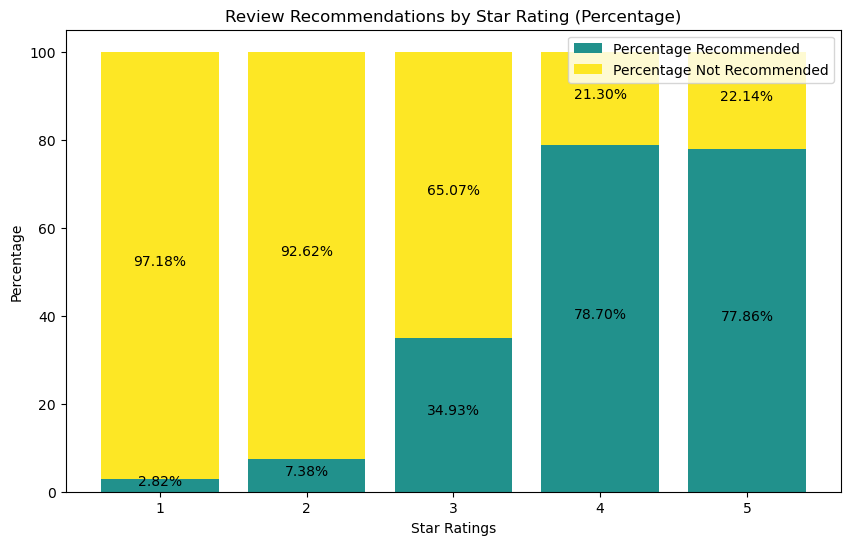

In [53]:
# Prepare the data dynamically
summary_data = {}
for rating in sorted(game['rating'].unique()):
    total_reviews = game[game['rating'] == rating]['recommended_review'].count()
    recommended_reviews = game[(game['rating'] == rating) & (game['recommended_review'] == 1)].count()['recommended_review']
    if total_reviews > 0:  # Prevent division by zero
        percentage_recommended = (recommended_reviews / total_reviews) * 100
        percentage_not_recommended = 100 - percentage_recommended
    else:
        percentage_recommended = 0
        percentage_not_recommended = 0
    
    summary_data[rating] = {
        'percentage_recommended': percentage_recommended,
        'percentage_not_recommended': percentage_not_recommended
    }

# Convert summary data to DataFrame for easier plotting
summary_df = pd.DataFrame.from_dict(summary_data, orient='index')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = viridis(np.linspace(0.5, 1, 2))

# Plotting percentages
ax.bar(summary_df.index, summary_df['percentage_recommended'], color=to_rgba(colors[0]), label='Percentage Recommended')
ax.bar(summary_df.index, summary_df['percentage_not_recommended'], bottom=summary_df['percentage_recommended'], color=to_rgba(colors[1]), label='Percentage Not Recommended')

# Adding labels on the bars for clarity
for index, row in summary_df.iterrows():
    ax.annotate(f"{row['percentage_recommended']:.2f}%", (index, row['percentage_recommended']/2), ha='center')
    ax.annotate(f"{row['percentage_not_recommended']:.2f}%", (index, 50 + row['percentage_recommended']/2), ha='center')

ax.set_xlabel('Star Ratings')
ax.set_ylabel('Percentage')
ax.set_title('Review Recommendations by Star Rating (Percentage)')
ax.legend()

plt.show()

**Findings so far:**  
The trend shows that as the star rating increases, the percentage of recommended reviews also increases, which is expected. However, the non-trivial percentage of non-recommendations even in high star ratings (especially the 5-star category) highlights that star ratings might not fully capture user satisfaction and recommendation likelihood.  

The presence of recommendations even in lower star ratings (1-star and 2-star) can indicate nuanced opinions about products, where users might see some redeeming qualities or specific features that they appreciated despite overall negative experiences.  

The reason why 4-star reviews may recommend the product more than 5-star reviews in our data appears to stem from the disproportional number of reviews between the two categories. We have proportionally more 5-star reviews than 4-star reviews.  

This discrepancy provides an opportunity to consider a hypothetical scenario: if the number of 5-star and 4-star reviews were equal, would we observe the same trend, with 4-star reviews being recommended more frequently, or could this be attributed to randomness?

Is there a specific star rating threshold above which we can confidently predict that a product will be recommended?

In [54]:
#Spot checking the 8 reviews that have 1-star yet has recommended the product
game[(game['rating'] == 1) & (game['recommended_review'] == 1)]

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
798,https://www.gamestop.com/gaming-accessories/controllers/nintendo-switch/products/nintendo-switch-joy-con-l-wireless-controller-neon-blue/10143658.html,Nintendo Switch Joy-Con (L) Wireless Controller Neon Blue,Nintendo,227057,Simon C,Poor return experience.,I purchased this because the original I bought was defective. GameStop would not honor the original sale price. I don't plan to return to GameStop.,1,Verified Purchaser,1,0,1 year ago,NaN,1.0,3.9133,738,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10143658%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=40,142885455,2aa0b73c-3108-5e64-bada-3181d35ee6ea,16/01/2022 16:18:16
824,https://www.gamestop.com/video-games/retro-gaming/retro-playstation/playstation-3/products/the-simpsons-game---playstation-3/10065006.html,The Simpsons Game - PlayStation 3,Electronic Arts,930082,Carlzombiellama,NO SOUND,Bought the game and it works just fine but there is NO SOUND.,1,NaN,0,2,3 years ago,NaN,1.0,4.0385,26,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10065006%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=0,115773394,787dae31-e2cf-5af8-9021-4226ce7df4cd,16/01/2022 16:18:17
918,https://www.gamestop.com/gaming-accessories/controllers/nintendo-switch/products/nintendo-switch-joy-con-l-wireless-controller-neon-blue/10143658.html,Nintendo Switch Joy-Con (L) Wireless Controller Neon Blue,Nintendo,227057,Bert69wes,Should have saved my money and tryed to buy new,It still had the same problem as the original one that came with the unit still has drift,1,Verified Purchaser,1,0,2 years ago,NaN,1.0,3.9133,738,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10143658%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=80,131187331,521b4339-0246-5236-8ceb-d9cae923c4e8,16/01/2022 16:18:19
1746,https://www.gamestop.com/video-games/wii/products/michael-jackson-the-experience---nintendo-wii/10084317.html,Michael Jackson The Experience - Nintendo Wii,Ubisoft,918038,rj curtis,game was scratched,i got the game and it was scratched and it did not work,1,Verified Purchaser,1,3,2 years ago,NaN,1.0,4.3975,239,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10084317%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=10,135820957,7030f653-8b2f-5cb4-a97e-fed064d0a693,16/01/2022 16:18:45
3158,https://www.gamestop.com/video-games/playstation-4/products/fallout-4---playstation-4/10122221.html,Fallout 4 - PlayStation 4,Bethesda Softworks,119073,Raiderzzz1,Fallout 4,"This game is a total grind, not enough content for me, I was told it’s skyrim in a modern day city. It’s nothing like Skyrim at all. Do yourself a favor and skip this title",1,Verified Purchaser,1,3,2 years ago,NaN,1.0,4.4535,1182,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10122221%7cIsRatingsOnly%3aeq%3afalse&Sort=submissiontime%3adesc&Offset=40,138501689,c73354a0-e6cd-5714-9a00-3697d591b3f6,16/01/2022 16:19:07
3929,https://www.gamestop.com/video-games/playstation-4/products/fallout-4---playstation-4/10122221.html,Fallout 4 - PlayStation 4,Bethesda Softworks,119073,Loopy66,Fallout 4,"After spending countless hours playing fallout 3, this game was very boring to me.",1,Verified Purchaser,0,1,3 years ago,NaN,1.0,4.4535,1182,https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Bazaarvoice-RatingAndReviews?Filter=Productid%3a10122221%7cIsRatingsOnly%3aeq%3afalse&Sort=sub

In [55]:
#Lets check how many brands are we dealing with?
game['brand'].nunique()

70

So we have 70 unique brands, each has different products. Lets see how many review do we have for each brands?

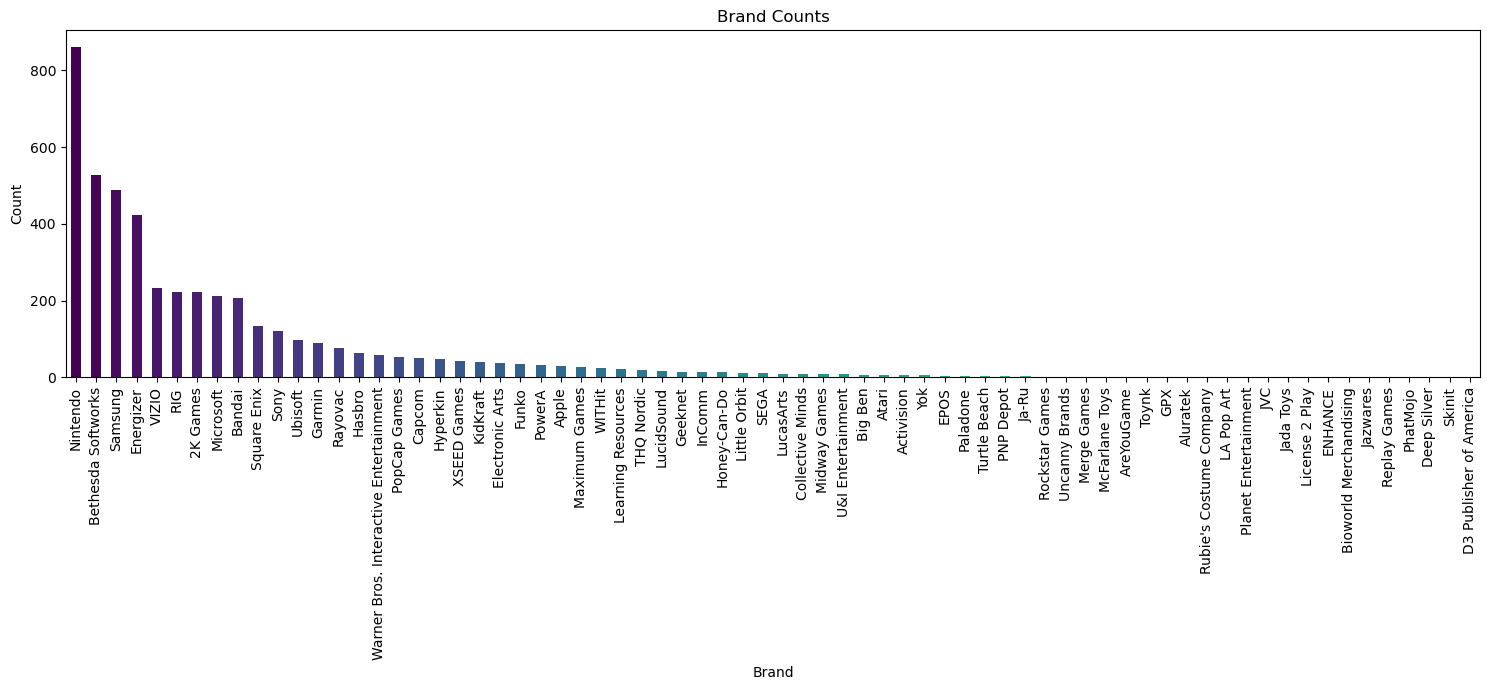

In [56]:
brand_counts = game['brand'].value_counts()

# Create a color map
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(brand_counts)) for i in range(len(brand_counts))]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 7))
brand_counts.plot(kind='bar', color=colors, title='Brand Counts', ax=ax)
plt.xlabel('Brand')
plt.ylabel('Count')

# Rotate the labels and adjust their font size
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

**Findings so far:**  
Nintendo has the highest number of reviews, significantly outnumbering other brands with over 800 reviews. 
This indicates a strong presence and possibly a higher sales volume or user engagement with Nintendo products on the Gamestop platform.
Brands like Bethesda, Microsoft, and Sony also have substantial numbers of reviews, which could reflect their popularity in the gaming community.
After the initial few brands, there is a long tail of brands with progressively fewer reviews. This pattern is typical in retail and e-commerce, where many smaller brands have limited but specific followings.
Marketing Strategy: The dominance of certain brands could influence Gamestop's marketing strategies, focusing more on these brands could drive more traffic and sales.  

**Inventory Management:** The number of reviews might correlate with sales volume, guiding inventory decisions.  

**Customer Engagement:** High-review brands might be doing something right to engage their users. Insights can be drawn by analyzing the content of the reviews for these brands.  

**Further Analysis Suggestions:**  
As we delve deeper into the data, we gain more insights, uncover potential use cases, and identify strategic solutions. So far, below is 

**Review Sentiment Analysis:** Analyzing the sentiment of the reviews could provide deeper insights into customer satisfaction across brands.  

**Correlation with Sales Data:** If sales data is available, correlating it with the number of reviews could validate assumptions about sales volume and customer engagement. This requires more data from the sales department.

**Time Series Analysis:** Examining how review counts change over time could reveal trends, seasonal variations, and the impact of specific promotions or events.  



Lets see what we can do with what we already have in this dataset. One idea is to build a model that can predict the sentiment of the reviews based on the review description and review title. Further we can dig deeper and consider other factors, such as the brand's name, the product, and etc.  

In [57]:
# Create a new column for our dependent variable, 'review_outcome'.
# Reviews with 4 or 5 stars are labeled as positive (1),
# and reviews with less than 3 stars are labeled as negative (0).
# This will help us later when we build a pipeline to predict whether a review is likely to be positive or negative.

game['sentiment'] = (game['rating'] >= 4).astype(int)
game[['sentiment','rating']].head()

,sentiment,rating
0,1,5.0
1,1,4.0
2,1,4.0
3,0,2.0
4,1,5.0


**Text Preprocessing**   
Next, I setup a Pipeline to preprocess the text in our dataset. This pipeline preprocesses the texts in two columns: "review descrption" and "title" as below:  
* Removes special characters    
* Converts text to lowercase  
* Applies lemmatization   
* Removes stop words


In [58]:
# Load stop words
stop_words = set(stopwords.words('english'))
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def remove_special_characters(text):
    """Remove special characters from the text."""
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_stopwords(text):
    """Remove stopwords from the text."""
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

def to_lowercase(text):
    """Convert all characters in the text to lowercase."""
    return text.lower()

def lemmatize_words(text):
    """Apply lemmatization to each word in the text."""
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

# Create a scikit-learn pipeline
preprocess = Pipeline([
    ('handle_missing', FunctionTransformer(lambda x: x.fillna(''))),  # Handle missing values
    ('remove_special_chars', FunctionTransformer(lambda x: x.apply(remove_special_characters))),
    ('lowercase', FunctionTransformer(lambda x: x.apply(to_lowercase))),
    ('lemmatize', FunctionTransformer(lambda x: x.apply(lemmatize_words))),
    ('remove_stopwords', FunctionTransformer(lambda x: x.apply(remove_stopwords)))
])


# Apply the pipeline to our data
game['Review_tokens'] = preprocess.fit_transform(game['review_description'])
game['Title_tokens'] = preprocess.fit_transform(game['review_title'])
# Display the processed text
print(game[['review_description', 'Review_tokens']].head())

**Vectorization and Feature Extraction**  

Now that we have everything we need, lets split our data to training and test, then vectorize it on the training set only (to avoid data leakage). 
Later we will use it in our EDA step. 

In [59]:
# Define dependant and independant variable
X = game[['Review_tokens', 'Title_tokens']]
y = game['sentiment']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Define a transformer for the text columns using  
text_transformer = ColumnTransformer(
    transformers=[
        ('tfidf_review', TfidfVectorizer(), 'Review_tokens'),
        ('tfidf_title', TfidfVectorizer(), 'Title_tokens')
    ],
    remainder='drop'
)

# Apply TF-IDF Vectorization to just the training data
X_train_transformed = text_transformer.fit_transform(X_train)
X_test_transformed = text_transformer.transform(X_test)

# Convert the vectorized data to a DataFrame (for EDA purposes)
feature_names = text_transformer.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_transformed.toarray(), columns=feature_names)
X_train_df.head(5)

,tfidf_review__03,tfidf_review__04,tfidf_review__08,tfidf_review__10,tfidf_review__100,tfidf_review__1000,tfidf_review__1000nit,tfidf_review__1000r,tfidf_review__10010,tfidf_review__100th,...,tfidf_title__youll,tfidf_title__young,tfidf_title__younger,tfidf_title__youre,tfidf_title__yourselv,tfidf_title__youve,tfidf_title__yr,tfidf_title__zelda,tfidf_title__zombie,tfidf_title__zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**EDA**  
Now that I have the vectorized data, I can perform EDA to understand feature distributions, importance, and potential correlations.  

**Distribution of Features**
Understanding how frequently terms appear across different documents and their TF-IDF scores can help us better understand the uniformity or sparsity of terms across our dataset (corpus).

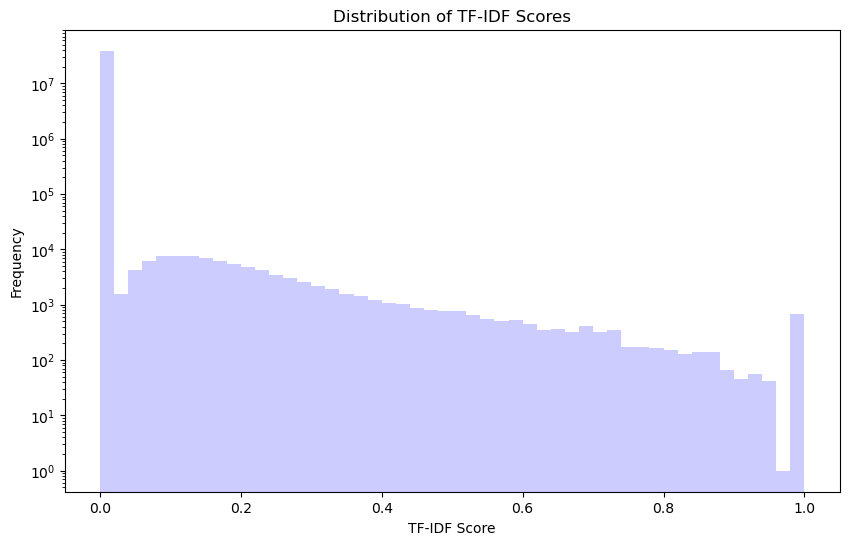

In [60]:
# Plotting the distribution of TF-IDF scores
plt.figure(figsize=(10, 6))
plt.hist(X_train_df.values.ravel(), bins=50, color='blue', alpha=0.2)
plt.title('Distribution of TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.yscale('log', nonpositive='clip')  # Use logarithmic scale for better visibility
plt.show()

**Takeaways:**  
The bar for TF-IDF scores close to 0, is extremely tall, indicating that a vast majority of the terms in our corpus have very low TF-IDF scores. This suggests that most words are either very common across all documents or appear infrequent in very few documents, therefore providing little unique information to distinguish between documents.  
  
  **Noise Reduction:** We might consider filtering out terms that have very low TF-IDF scores as they are likely to be common terms across documents and do not contribute to differentiating any document in a meaningful way.  
    
   **Feature Selection:** We can focus on terms with higher TF-IDF scores for feature selection in our machine learning model since these are more relevant in characterizing the content of each document.  
     
     
   **Model Efficiency considerations:** Removing or down-weighting the low-value features can also improve the efficiency and possibly the performance of our machine learning model by reducing dimensionality and focusing on more informative attributes.  For this, we may apply a threshold to only keep terms with TF-IDF scores above a certain value, for instance, 0.1 or higher.  
   But before taking model efficiency into account, lets review the terms with highest TF-IDF scores to ensure they are relevant and not anomalies or artifacts of data processing (like misspellings or concatenations).

**Feature Importance:**  
Feature importance in the context of TF-IDF vectorized data involves identifying terms that have the highest TF-IDF scores across documents. Higher scores indicate terms that are more relevant in a document, relative to other documents in the corpus.

In [61]:
# Calculate the mean TF-IDF score for each term across all documents
mean_tfidf = np.mean(X_train_df, axis=0)
top_tfidf = mean_tfidf.sort_values(ascending=False).head(20)  # Look at top 20 terms

print("Top TF-IDF Scores for Terms:")
print(top_tfidf)

Top TF-IDF Scores for Terms:
tfidf_title__great         0.075921
tfidf_review__game         0.065002
tfidf_title__game          0.062462
tfidf_review__wa           0.038441
tfidf_review__great        0.033706
tfidf_title__awesome       0.031834
tfidf_title__good          0.031032
tfidf_review__battery      0.029042
tfidf_review__love         0.028210
tfidf_review__review       0.024994
tfidf_review__part         0.024847
tfidf_title__amazing       0.024031
tfidf_review__collected    0.024021
tfidf_review__promotion    0.024020
tfidf_title__love          0.022874
tfidf_review__like         0.022737
tfidf_review__good         0.022724
tfidf_title__best          0.022371
tfidf_title__fun           0.021591
tfidf_review__play         0.021181
dtype: float64


Lets spot check [tfidf_review__wa           0.038441], and see what does "wa" is refering? By printing out examples of documents that contain 'wa', I can manually inspect the usage and context. This will help me determine if the term has significant meaning or is just noise.

**Other Takeaways**  

This analysis gives us insights into what aspects or characteristics are frequently highlighted in our dataset, such as product quality ("great", "good"), user engagement ("love", "fun"), and specific aspects like "battery".  

tfidf_title__great and tfidf_review__game - These terms have the highest scores, which suggests they are key terms in the 'Title' and 'Review' texts respectively.


<span style="color:red">2. Certain terms dominate but are not useful (e.g., generic terms like "game" in a dataset entirely about games), we might consider additional preprocessing steps to remove or down-weight these terms.  (Consult with the mentor).</span>

<span style="color:green">3.We can examine how these terms correlate with other features in our dataset (e.g., ratings, user engagement metrics) or their distribution across different classes or categories in our dataset.</span>

In [62]:
# Set the display.max_colwidth to None to show full contents of each column wghen printing
pd.set_option('display.max_colwidth', None)

# Convert tokens back to sentences
game['Review_tokens'] = game['Review_tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Function to extract the context of "wa"
def extract_context(text, keyword, window=4):
    words = text.split()
    if keyword in words:
        index = words.index(keyword)
        start = max(0, index - window)
        end = min(len(words), index + window + 1)
        return ' '.join(words[start:end])
    return ""

# Apply the function to our data
game['wa_context'] = game['Review_tokens'].apply(lambda x: extract_context(x, 'wa'))

# Display the contexts where 'wa' appears
print(game[game['wa_context'] != ''][['review_description', 'wa_context']].head(3))

Got it. The [tfidf_review__wa           0.038441] is refering to the word "was". So far, The rest of the top 20 terms with high TF-IDF seems to have no anomaly or artifacts of data processing.  <span style="color:red"> Question is what should we do with "was"? is it safe to eliminate it? Is it carrying any sentimental values in our analysis?</span>


**Dimensionality Reduction**  
High-dimensional data can be challenging to visualize and analyze. In the next section, Im using PCA to help reduce the number of features while retaining the essential information. By reducing the dimensionality, PCA can help mitigate overfitting since models are less likely to learn noise in the data.
<span style="color:red"> Should I standardize the features before applying PCA?</span>

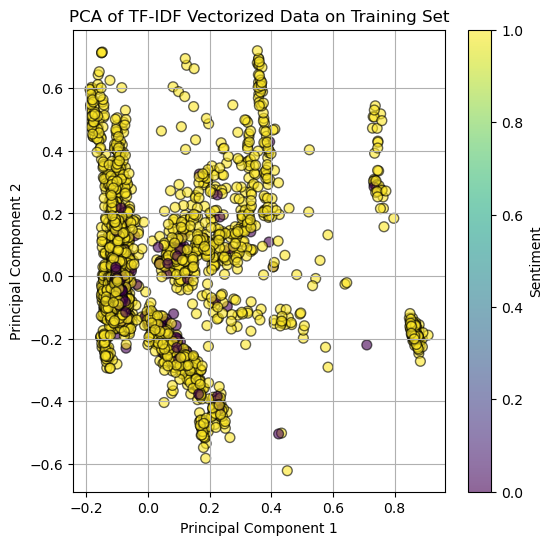

In [63]:
# Apply PCA to reduce dimensions to 2 for visualization on the training data
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train_transformed.toarray())  # Ensuring it's in the correct format

# Since we need to use 'y_train' for correct sentiment representation
plt.figure(figsize=(6,6))
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.title('PCA of TF-IDF Vectorized Data on Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Sentiment')
plt.grid(True)
plt.show()

**Takeaways**  
* Points that significantly deviate from others could be outliers or anomalies. We can look into that later.

* The color gradient, representing sentiment, does not show a clear segregation by color in any specific part of the plot. The sentiment colors are mixed throughout different clusters and along different axes, suggesting that the first two principal components may not directly capture variations strongly correlated to sentiment. This implies that the factors influencing sentiment might be more complex or not well represented by linear combinations of the TF-IDF features.Other features or more components might be necessary for better sentiment prediction.  
  
 * The clusters could indicate similarities in word usage among the reviews. For instance, certain clusters might represent reviews discussing similar topics or using similar language, regardless of the sentiment. This can be useful for topic modeling or segmentation tasks.   
  
  **Future considerations**  
  The PCA plot indicates complex underlying patterns in the data that are not solely driven by sentiment as categorized. The next steps would involve deepening the analysis with more dimensions, considering different or more complex features, and potentially using different or more sophisticated analytical techniques to better understand and model the sentiment in our data. Some listed below:
*  Revisiting preprocessing steps like TF-IDF parameter tuning.
* Exploring alternative or additional features beyond basic TF-IDF, such as n-grams, sentiment scores of words, or other embeddings like Word2Vec or BERT.
* Use the coordinates of the data points in the reduced PCA space as input features for machine learning models. This usage can lead to more efficient training and potentially better generalization, especially if the original dimensionality is very high.

C:\Users\ghaza\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ghaza\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ghaza\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ghaza\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

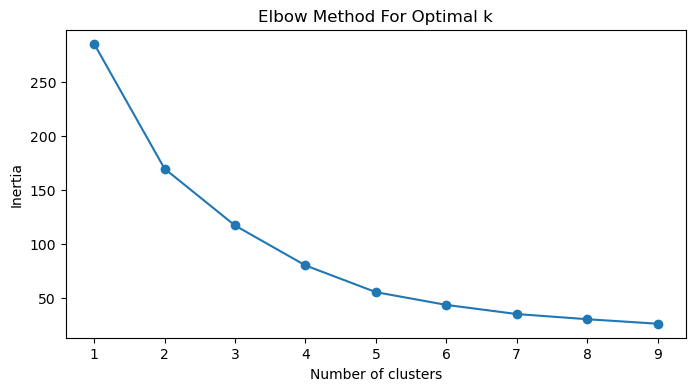

C:\Users\ghaza\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
# Choosing an appropriate number of clusters via the elbow method
inertia = []
for k in range(1, 10):  # Test different numbers of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_train)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph to find the optimal k
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choosing k based on the elbow plot and fitting K-means
k_optimal = 5 
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_pca_train)

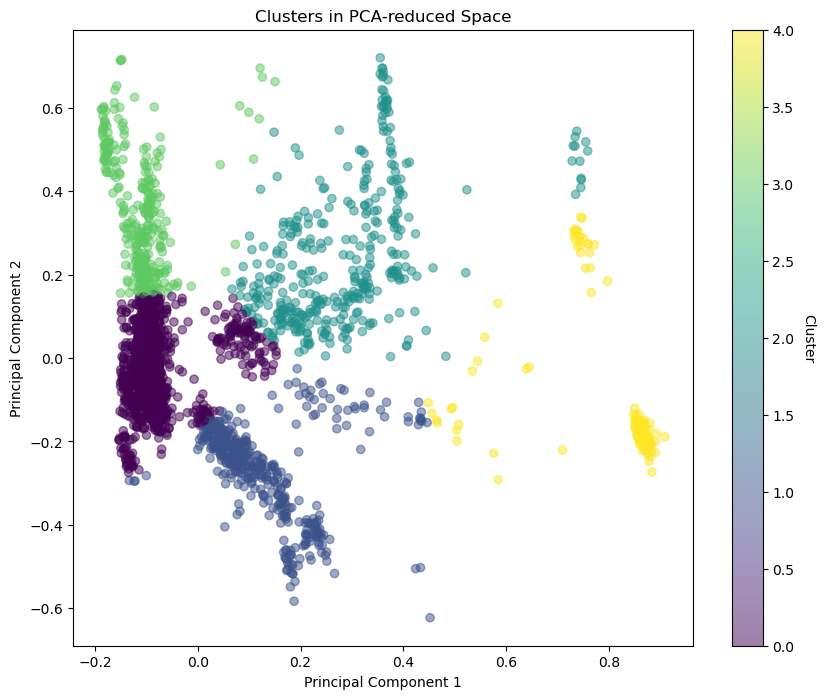

In [66]:
# Plotting a scatter plot of the PCA-reduced data colored by clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('Clusters in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Create a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster', rotation=270, labelpad=15)  # Proper way to set the title for the colorbar

plt.show()

Lets check with our feature correlation below:

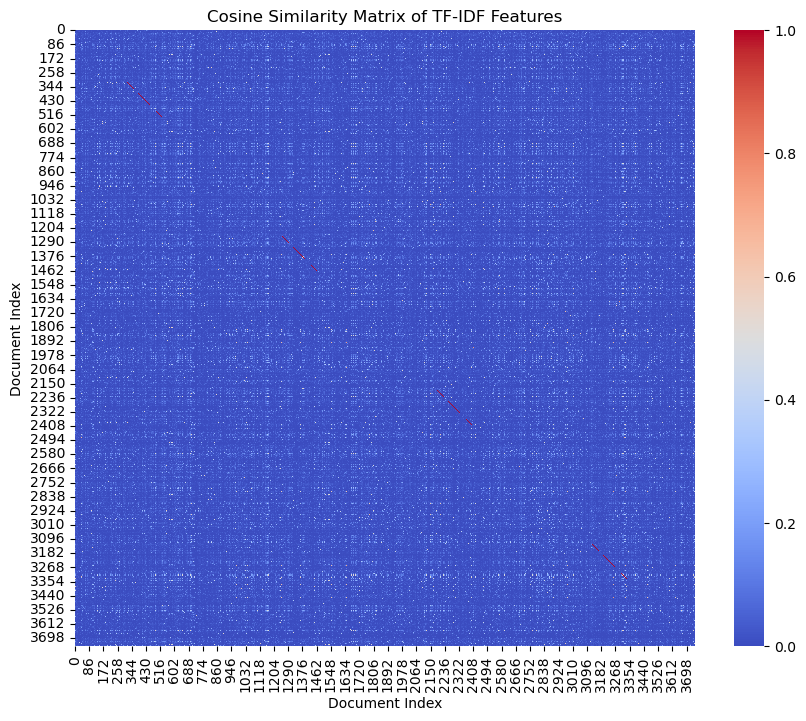

In [30]:
# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(X_train_df)

# Visualize the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, cmap='coolwarm')
plt.title('Cosine Similarity Matrix of TF-IDF Features')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()

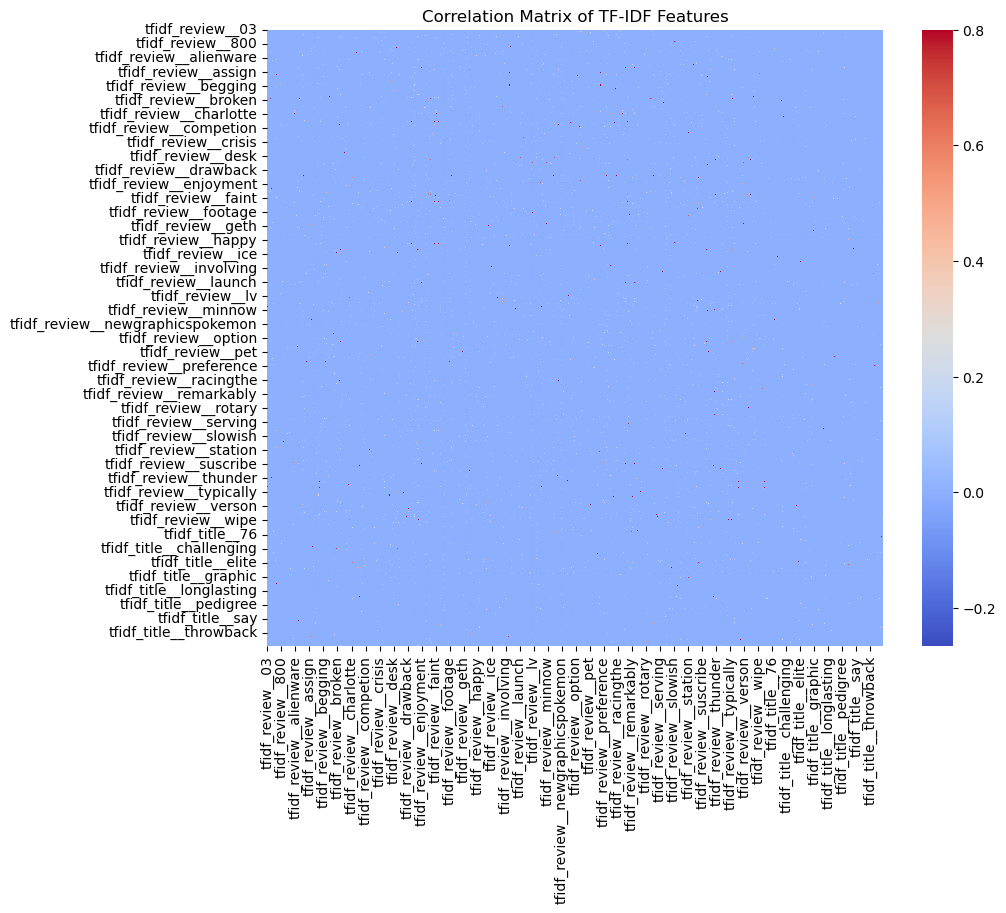

In [28]:
# Generate a pearson correlation matrix
corr_matrix = X_train_df.corr()
# Plot them
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmax=0.8, square=True, cmap='coolwarm')
plt.title('Correlation Matrix of TF-IDF Features')
plt.show()

The majority of the space in the matrix is blue, indicating low or no correlation between most pairs of features (TF-IDF terms).
The red dots, although sparse, indicate points where there is a higher degree of correlation between certain pairs of terms. These might be words that often appear together in the same contexts or documents.  
Reducing the number of features by eliminating highly correlated terms can simplify our model and reduce the computational cost without significantly impacting performance.

In [29]:
# Threshold for high correlation
high_corr_threshold = 0.6  # Adjust based on your specific analysis needs

# Find pairs of highly correlated features
highly_corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_corr_pairs = highly_corr_pairs.stack().reset_index()
highly_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
highly_corr_pairs = highly_corr_pairs[highly_corr_pairs['Correlation'] > high_corr_threshold]

print("Highly correlated term pairs:")
print(highly_corr_pairs)

Highly correlated term pairs:
                       Feature1                  Feature2  Correlation
0              tfidf_review__03          tfidf_review__04     1.000000
4544           tfidf_review__03  tfidf_review__manhandled     1.000000
5892           tfidf_review__03          tfidf_review__r2     1.000000
6043           tfidf_review__03     tfidf_review__recover     1.000000
8809           tfidf_review__03      tfidf_title__control     0.626660
...                         ...                       ...          ...
53694507    tfidf_title__supply     tfidf_title__tabletop     0.667634
53715290   tfidf_title__trilogy       tfidf_title__wrapup     0.628866
53720312     tfidf_title__ultra         tfidf_title__wide     0.723266
53722130  tfidf_title__universe       tfidf_title__yakuza     1.000000
53731204     tfidf_title__world       tfidf_title__yoshis     0.663631

[26392 rows x 3 columns]


From here, moving foraward, we have multiple action items we can take:  
* Review Data Processing to ensure that the processes aren't artificially inflating similarity by overly reducing words to a common root.  

* For pairs with a correlation of 1.0 we can remove one of the terms from each pair from our dataset to reduce redundancy and potentially improve model performance.  

* Or we can Cluster highly correlated terms to identify underlying themes or topics which might be more informative than considering them individually.  

* Consider using techniques like regularization (e.g., Lasso, which can zero out coefficients of less important features) in our modeling to help automatically reduce the impact of less informative features.

<span style="color:red"> Consult with the mentor </span>

**Model choice:**  
If we incorporate brand names into our analysis, our data might be considered imbalanced since user engagement with Nintendo products is significantly higher than the other brands. **SVM** is capable of managing datasets with high levels of noise and outliers, and it effectively handles imbalanced datasets. Consult with mentor